<a href="https://colab.research.google.com/github/Tien84/BitcoinPrediction/blob/master/demoSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 15.1 MB/s 
     |████████████████████████████████| 9.8 MB 34.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install pyramid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 246 kB 9.8 MB/s 
     |████████████████████████████████| 114 kB 37.1 MB/s 
     |████████████████████████████████| 251 kB 38.2 MB/s 


In [128]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [129]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from statsmodels.tsa.seasonal import seasonal_decompose



In [130]:
def parser(s):
  return datetime.strptime(s, '%Y-%m-%d')

In [131]:
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], squeeze=True, date_parser=parser)
df = pd.read_csv('/content/driver/My Drive/DataSet/DataBitcoin.csv', parse_dates=['Date'], index_col='Date')
df.tail(2558)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-03,361.872986,417.899994,357.647003,403.416992,403.416992,206162000
2015-11-04,403.664001,495.562012,380.548004,411.562988,411.562988,263900000
2015-11-05,408.076996,447.561005,374.580994,386.354004,386.354004,151824992
2015-11-06,388.046997,395.835999,354.024994,374.470001,374.470001,122687000
2015-11-07,374.269012,390.585999,372.433014,386.481995,386.481995,56625100
...,...,...,...,...,...,...
2022-10-30,20817.982422,20917.005859,20547.462891,20635.603516,20635.603516,31486345556
2022-10-31,20633.695313,20795.320313,20287.458984,20495.773438,20495.773438,45668466815
2022-11-01,20494.898438,20647.289063,20359.845703,20485.273438,20485.273438,39819303159


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2558 entries, 2015-11-03 to 2022-11-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2558 non-null   float64
 1   High       2558 non-null   float64
 2   Low        2558 non-null   float64
 3   Close      2558 non-null   float64
 4   Adj Close  2558 non-null   float64
 5   Volume     2558 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.9 KB


In [133]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-03,361.872986,417.899994,357.647003,403.416992,403.416992,206162000
2015-11-04,403.664001,495.562012,380.548004,411.562988,411.562988,263900000
2015-11-05,408.076996,447.561005,374.580994,386.354004,386.354004,151824992
2015-11-06,388.046997,395.835999,354.024994,374.470001,374.470001,122687000
2015-11-07,374.269012,390.585999,372.433014,386.481995,386.481995,56625100
...,...,...,...,...,...,...
2022-10-30,20817.982422,20917.005859,20547.462891,20635.603516,20635.603516,31486345556
2022-10-31,20633.695313,20795.320313,20287.458984,20495.773438,20495.773438,45668466815
2022-11-01,20494.898438,20647.289063,20359.845703,20485.273438,20485.273438,39819303159


In [134]:
start_date = datetime(2015,11,3)
end_date = datetime(2022,11,3)
lim_df = df[start_date:end_date]['Adj Close']
lim_df

Date
2015-11-03      403.416992
2015-11-04      411.562988
2015-11-05      386.354004
2015-11-06      374.470001
2015-11-07      386.481995
                  ...     
2022-10-30    20635.603516
2022-10-31    20495.773438
2022-11-01    20485.273438
2022-11-02    20159.503906
2022-11-03    20335.416016
Freq: D, Name: Adj Close, Length: 2558, dtype: float64

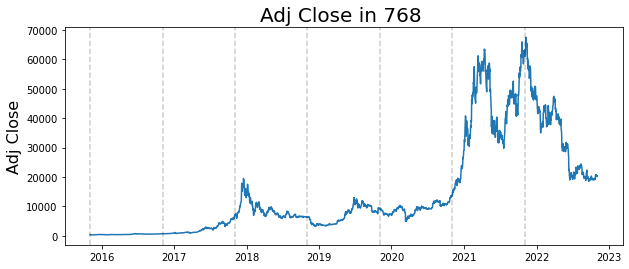

In [135]:
plt.figure(figsize=(10,4))
plt.plot(lim_df)
plt.title('Adj Close in 768 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-11-03'), color='k', linestyle='--', alpha=0.2)
plt.show()

In [136]:
#first_diff = lim_df.diff()[1:]
first_diff = lim_df.diff()

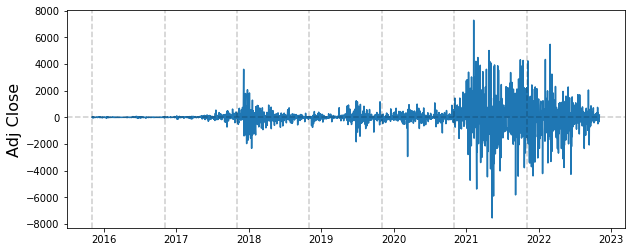

In [137]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
#plt.title('Adj Close in 768 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-11-03'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [138]:
import numpy as np

# Get training and testing sets
train_end = datetime(2020,9,26)
test_end = datetime(2022,11,3)

train_data = list(df[:train_end]['Adj Close'])
test_data = df[train_end + timedelta(days=1):test_end]['Adj Close']


#test_data = df[train_end + timedelta(days=1):test_end]['Adj Close']

#train_data = lim_df[:train_end]['Adj Close']
#test_data = lim_df[train_end + timedelta(days=1):test_end]['Adj Close']

#train_data = list(lim_df[:train_end]['Adj Close'])
#test_data = list(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])
train_data = lim_df[:train_end]
test_data = lim_df[train_end + timedelta(days=1):test_end]


#train_data = list(lim_df[:1790]['Adj Close'])
#test_data = list(lim_df[1790:]['Adj Close'])

#test_data = list(df[train_end:test_end]['Adj Close'])

#train_data = df[df.index < '2017-05-05'], df[df.index >= '2012-01-03']
#test_data = df[df.index < '2020-01-09'], df[df.index >= '2017-05-05']

#train_data, test_data = lim_df[lim_df.index < '2012-01-03'], lim_df[lim_df.index >= '2020-01-09']
print('train shape: ', train_data.shape)
print('test shape: ', test_data.shape)
print (len(train_data))
print(len(test_data))



train shape:  (1790,)
test shape:  (768,)
1790
768


In [89]:
#ACF plot and PACF plot with 99% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#n_test_ob = len(test_data)
#n_test_ob
#plot_acf(df['Adj Close'], lags=20, alpha=0.01)
#plot_acf(test_data, lags= 16, alpha=0.01)
#plot_acf(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])
#plot_pacf(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])


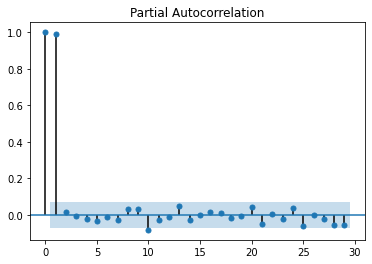

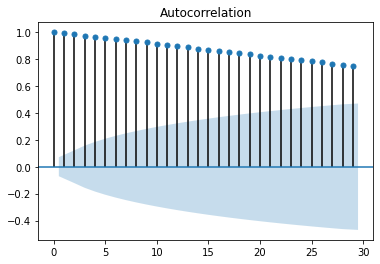

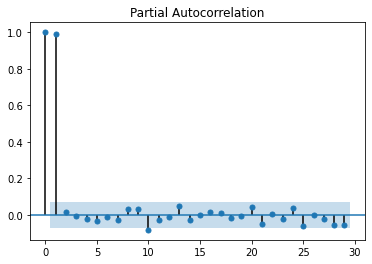

In [115]:
#ACF plot and PACF plot with 95% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#Differencing
data_df = df.diff()
data_df = data_df.dropna()
data_df
#plot_acf(df['Adj Close'], lags=20, alpha=0.05)
#plot_acf(test_data, lags=20, alpha=0.05)
#plot_pacf(test_data, lags=20, alpha=0.05)
plot_acf(test_data)
plot_pacf(test_data)

In [116]:
#ACF values and PACF values
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
#print(acf(df['Adj Close']))
print(acf(test_data))
print(pacf(test_data))

[1.         0.99169113 0.98368118 0.97565298 0.96738743 0.95870766
 0.94996716 0.94088171 0.93233352 0.92428919 0.91514558 0.90575993
 0.896341   0.88766187 0.87858704 0.86954362 0.86071281 0.85217979
 0.84353874 0.83490805 0.82686223 0.81818431 0.80984588 0.80127481
 0.79322123 0.78442327 0.77584856 0.76697105 0.75744799 0.74740685
 0.73795639 0.72846586 0.71810886 0.70858884 0.69796162 0.68722666
 0.6763515  0.66599075 0.65503451 0.64446827 0.63433506]
[ 1.00000000e+00  9.92984074e-01  1.66038973e-02 -5.55997942e-03
 -2.18515422e-02 -3.54515602e-02 -1.07887488e-02 -3.00055451e-02
  3.34623475e-02  3.42885966e-02 -8.21680265e-02 -2.66239494e-02
 -1.20508806e-02  4.92732759e-02 -2.89039515e-02 -3.12729343e-03
  1.55201939e-02  1.12184784e-02 -1.90118941e-02 -4.25672436e-03
  4.49642011e-02 -4.86312848e-02  6.78598312e-03 -2.07614462e-02
  3.56538231e-02 -5.82433233e-02 -9.57910685e-04 -2.05741309e-02
 -5.48529203e-02 -5.29490232e-02  3.91364744e-02  5.31305281e-04
 -6.47549946e-02  4.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:662: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1029: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


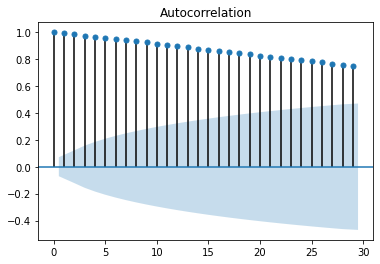

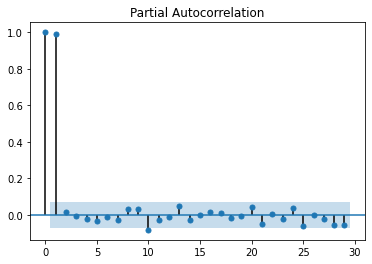

In [139]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
#Seasonal differencing
data_df = df.diff(12)
data_df = data_df.dropna()

#plot ACF
#plot_acf(data_df['Adj Close'], lags= 30)
#plot_acf(data_df['Adj Close'])
plot_acf(test_data)
#plot PACF
#plot_pacf(data_df['Adj Close'], lags=30)
#plot_pacf(data_df['Adj Close'])
plot_pacf(test_data)
plt.show()

In [ ]:
#from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
model_sarima = auto_arima(test_data, start_p=3, start_q=3,
                           max_p=5, max_q=5, m=24,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(model_sarima.aic())

In [ ]:
model_sarima.summary()

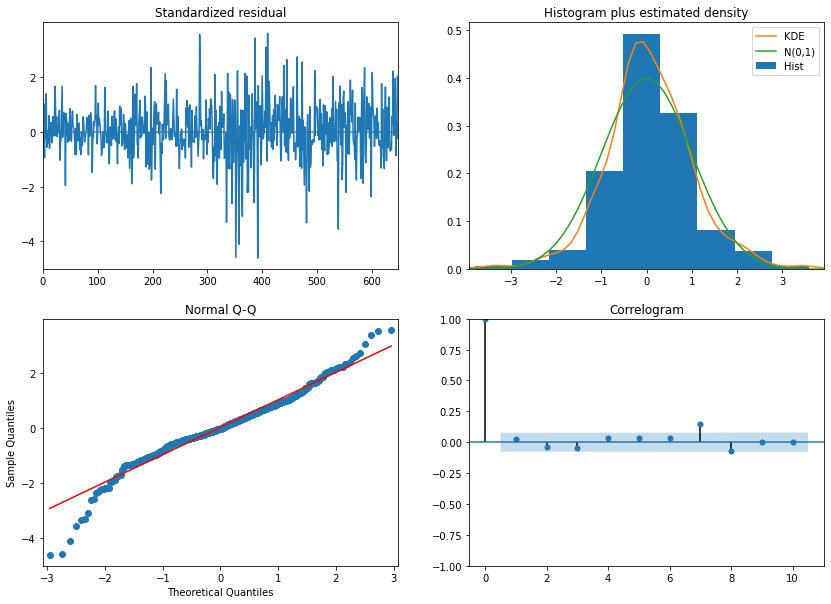

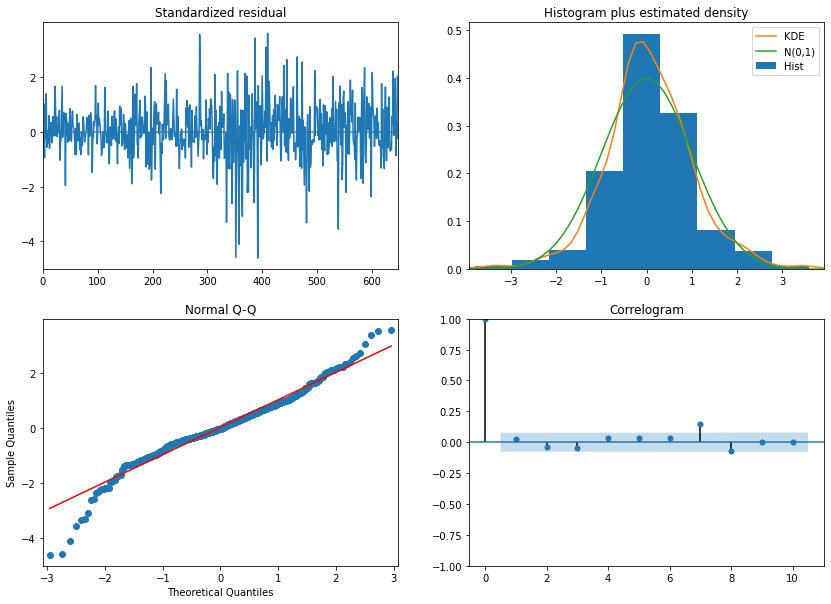

In [ ]:
model_sarima.plot_diagnostics(figsize=(14,10))

In [16]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model_2 = sm.tsa.statespace.SARIMAX(test_data, order=(1,1,1),
                                  seasonal_order=(1,1,1,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results_2 = model_2.fit()
print(results_2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                  768
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6501.671
Date:                            Mon, 14 Nov 2022   AIC                          13013.342
Time:                                    00:56:47   BIC                          13036.382
Sample:                                09-27-2020   HQIC                         13022.225
                                     - 11-03-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8011      0.260      3.083      0.002       0.292       1.310
ma.L1         -0.7768      0.279   

In [43]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model_3 = sm.tsa.statespace.SARIMAX(test_data, order=(2,1,2),
                                  seasonal_order=(2,1,2,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results_3 = model_3.fit()
print(results_3.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                  768
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -6461.163
Date:                            Mon, 14 Nov 2022   AIC                          12940.326
Time:                                    01:16:52   BIC                          12981.639
Sample:                                09-27-2020   HQIC                         12956.267
                                     - 11-03-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3365      1.657     -0.807      0.420      -4.583       1.910
ar.L2         -0.5554      1.088   

In [ ]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(test_data, order=(3,1,3),
                                  seasonal_order=(3,1,3,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                  768
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 12)   Log Likelihood               -6346.096
Date:                            Sun, 13 Nov 2022   AIC                          12718.192
Time:                                    10:18:20   BIC                          12777.632
Sample:                                09-27-2020   HQIC                         12741.147
                                     - 11-03-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4357      0.177      2.465      0.014       0.089       0.782
ar.L2          0.3268      0.224   

In [ ]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model_1 = sm.tsa.statespace.SARIMAX(test_data, order=(1,0,0),
                                  seasonal_order=(3,1,3,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results_1 = model_1.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                         SARIMAX Results                                          
Dep. Variable:                                  Adj Close   No. Observations:                  768
Model:             SARIMAX(1, 0, 0)x(3, 1, [1, 2, 3], 12)   Log Likelihood               -6373.926
Date:                                    Sun, 13 Nov 2022   AIC                          12763.852
Time:                                            12:33:01   BIC                          12800.475
Sample:                                        09-27-2020   HQIC                         12777.991
                                             - 11-03-2022                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9921      0.007    137.496      0

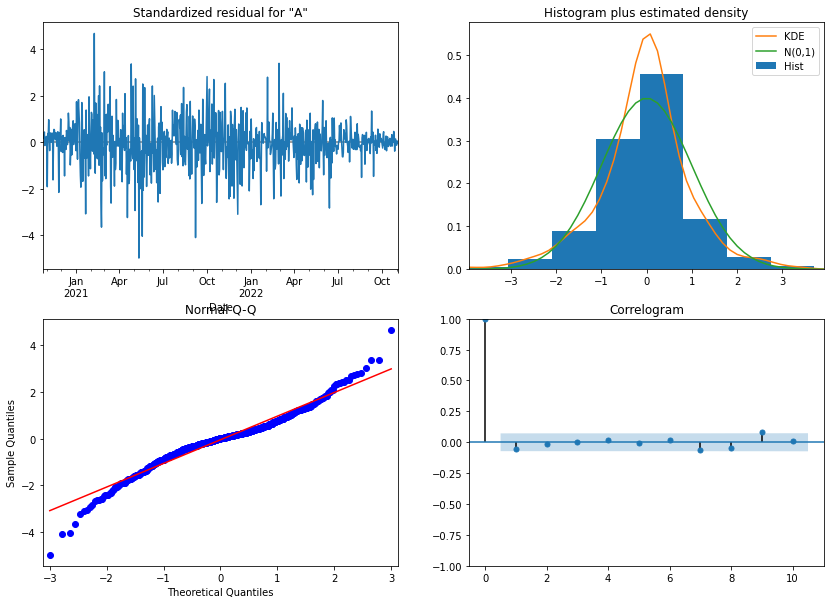

In [17]:
results_2.plot_diagnostics(figsize=(14,10))
plt.show()

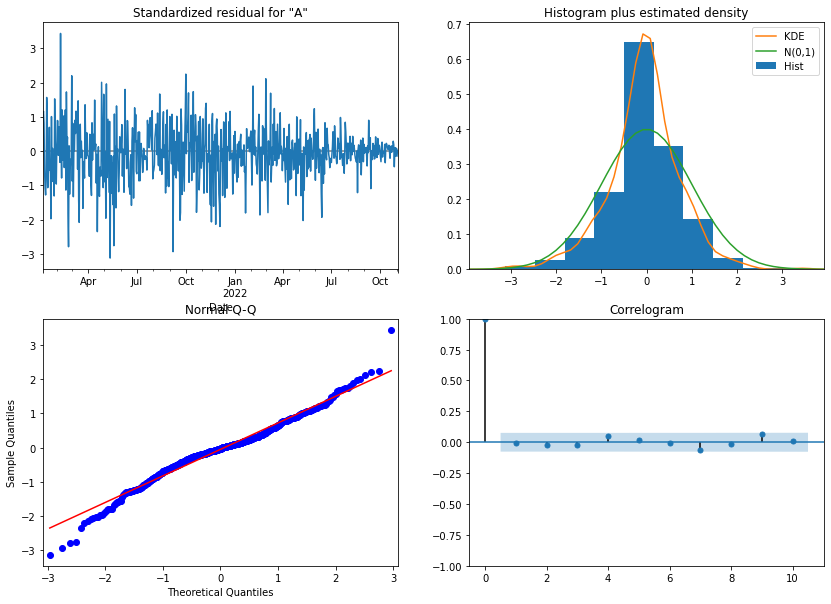

In [ ]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

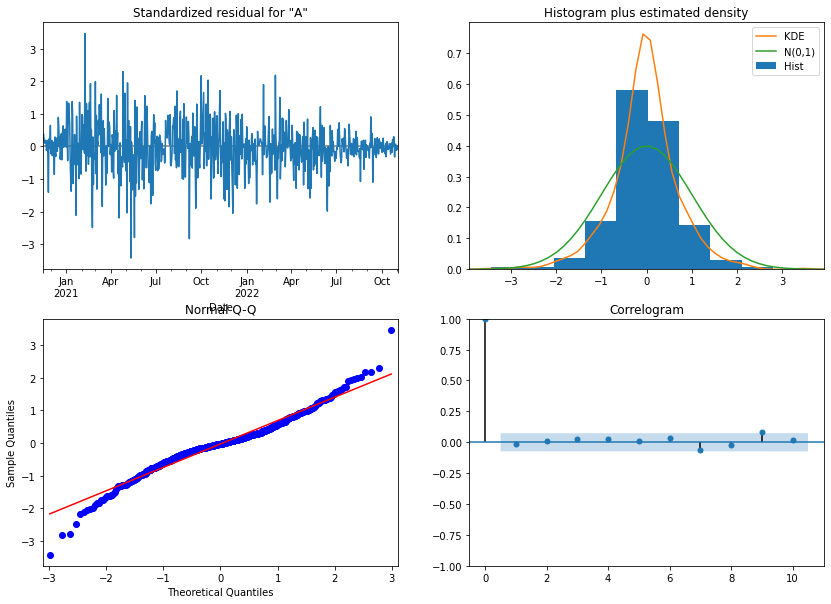

In [ ]:
results_1.plot_diagnostics(figsize=(14,10))
plt.show()

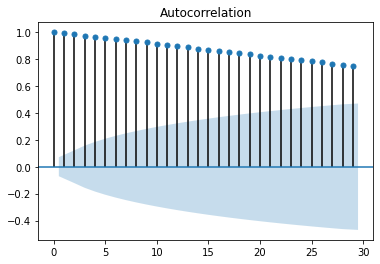

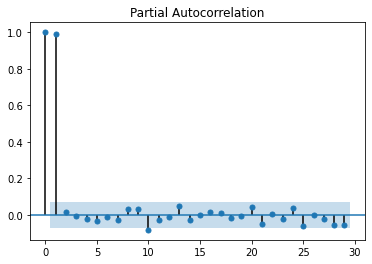

In [117]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
#Seasonal differencing
data_df = df.diff(24)
data_df = data_df.dropna()

#plot ACF
#plot_acf(data_df['Adj Close'], lags= 30)
#plot_acf(data_df['Adj Close'])
plot_acf(test_data)
#plot PACF
#plot_pacf(data_df['Adj Close'], lags=30)
#plot_pacf(data_df['Adj Close'])
plot_pacf(test_data)
plt.show()

In [69]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model_4 = sm.tsa.statespace.SARIMAX(test_data, order=(1,0,0),
                                  seasonal_order=(1,0,0,24),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results_4 = model_4.fit()
print(results_4.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                  768
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 24)   Log Likelihood               -6494.514
Date:                            Mon, 14 Nov 2022   AIC                          12995.028
Time:                                    01:35:55   BIC                          13008.860
Sample:                                09-27-2020   HQIC                         13000.360
                                     - 11-03-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9993      0.001    785.712      0.000       0.997       1.002
ar.S.L24       0.0845      0.026   

In [118]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model_6 = sm.tsa.statespace.SARIMAX(test_data, order=(2,1,2),
                                  seasonal_order=(2,1,2,24),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results_6 = model_6.fit()
print(results_6.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                  768
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 24)   Log Likelihood               -6131.082
Date:                            Mon, 14 Nov 2022   AIC                          12280.164
Time:                                    01:51:41   BIC                          12321.020
Sample:                                09-27-2020   HQIC                         12295.965
                                     - 11-03-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0177      1.629     -0.625      0.532      -4.211       2.176
ar.L2         -0.1257      1.276   

In [94]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model_5 = sm.tsa.statespace.SARIMAX(test_data, order=(1,1,1),
                                  seasonal_order=(1,1,1,24),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results_5 = model_5.fit()
print(results_5.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                  768
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood               -6303.348
Date:                            Mon, 14 Nov 2022   AIC                          12616.696
Time:                                    01:43:31   BIC                          12639.571
Sample:                                09-27-2020   HQIC                         12625.529
                                     - 11-03-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6636      0.340     -1.951      0.051      -1.330       0.003
ma.L1          0.6455      0.350   

In [ ]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(test_data, order=(3,1,3),
                                  seasonal_order=(3,1,3,24),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                          Adj Close   No. Observations:                  768
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 24)   Log Likelihood               -5910.394
Date:                            Sun, 13 Nov 2022   AIC                          11846.788
Time:                                    10:29:51   BIC                          11905.325
Sample:                                09-27-2020   HQIC                         11869.466
                                     - 11-03-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1900      2.037     -0.093      0.926      -4.182       3.802
ar.L2         -0.7909      0.986   

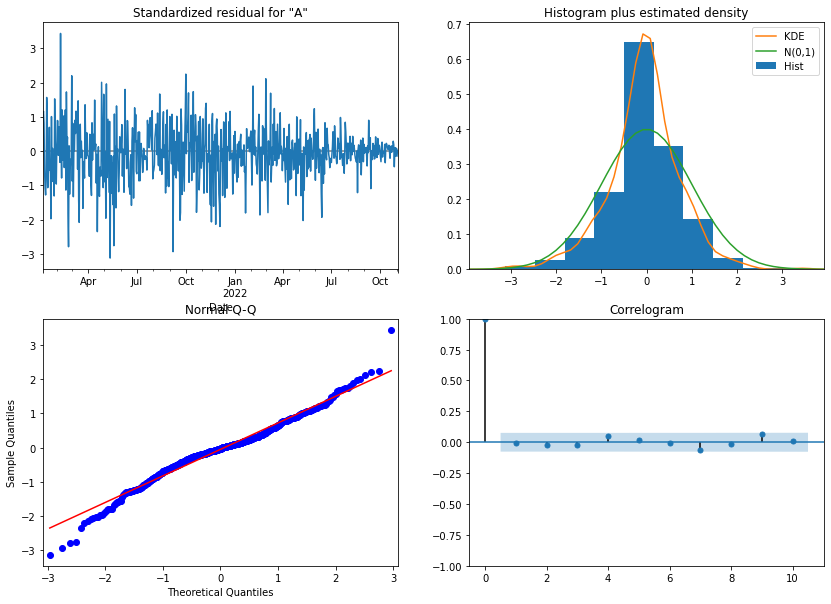

In [ ]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

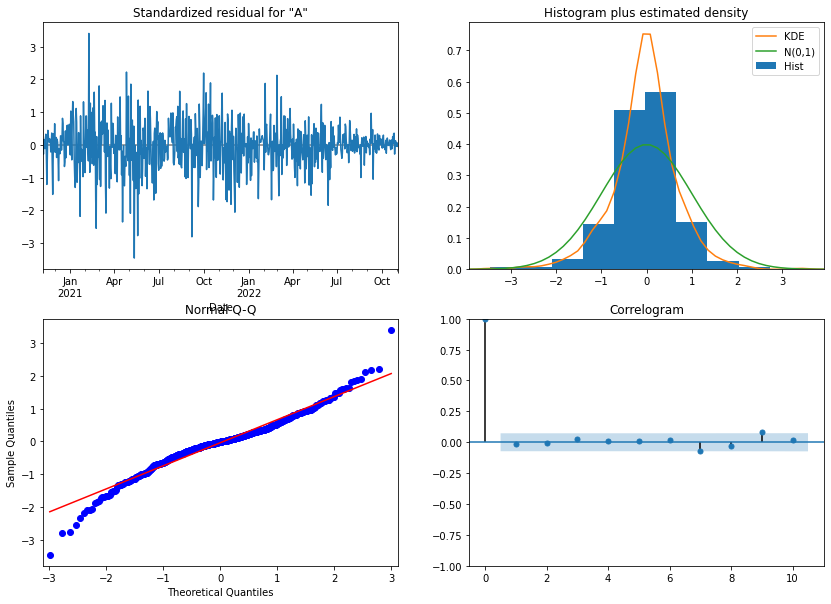

In [44]:
results_3.plot_diagnostics(figsize=(14,10))
plt.show()

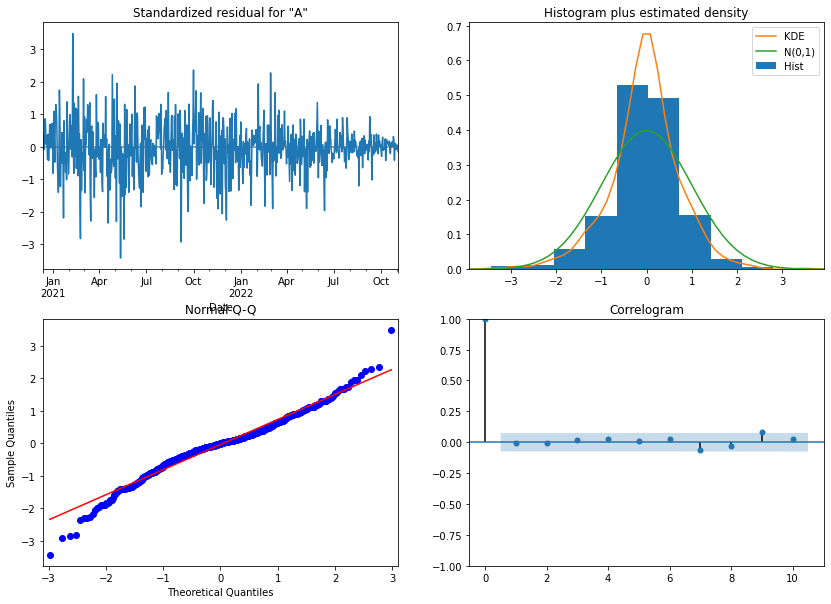

In [119]:
results_6.plot_diagnostics(figsize=(14,10))
plt.show()

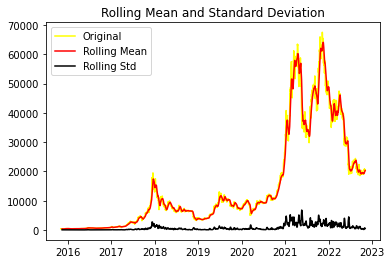

Results of fuller test
Test Statistics                  -1.595592
p-value                           0.485807
No. of lags used                 27.000000
Number of observations used    2530.000000
critical value (1%)              -3.432937
critical value (5%)              -2.862683
critical value (10%)             -2.567379
dtype: float64


In [45]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df['Adj Close'])

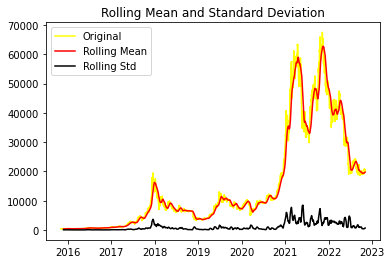

Results of fuller test
Test Statistics                  -1.595592
p-value                           0.485807
No. of lags used                 27.000000
Number of observations used    2530.000000
critical value (1%)              -3.432937
critical value (5%)              -2.862683
critical value (10%)             -2.567379
dtype: float64


In [120]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df['Adj Close'])

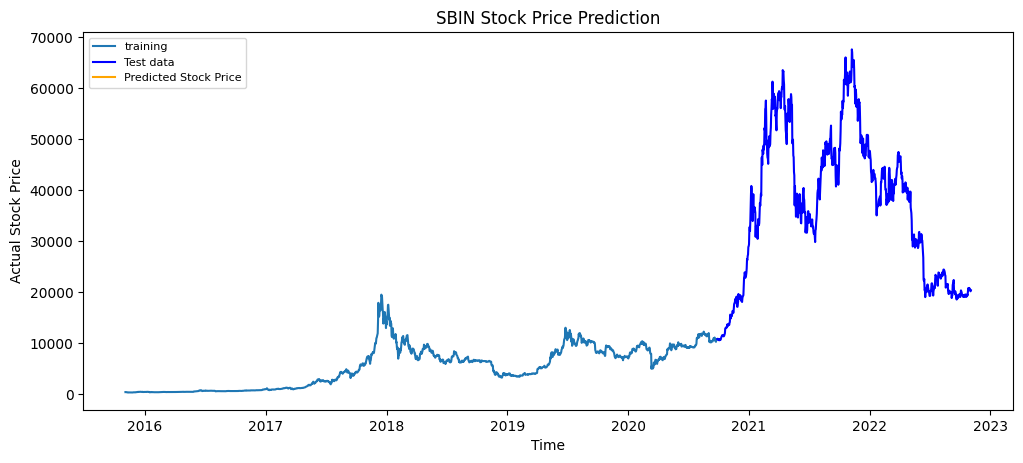

In [122]:
# Forecast
#fc, se, conf = results.forecast(519, alpha=0.05)  # 95% confidence
#fc = results.forecast(768, alpha=0.05)
fc = results_6.forecast(len(test_data))
conf = results_6.forecast(len(test_data))

fc_series = pd.Series(fc, index=test_data.index)
#fc_series = pd.Series(fc,lim_df[train_end:], df['Adj Close'])

lower_series = pd.Series(lim_df[: train_end], df['Adj Close'])
upper_series = pd.Series(lim_df[train_end:], df['Adj Close'])

#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)


#lower_series = pd.Series(lim_df[: train_end], index=test_data.index)
#upper_series = pd.Series(lim_df[train_end:], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


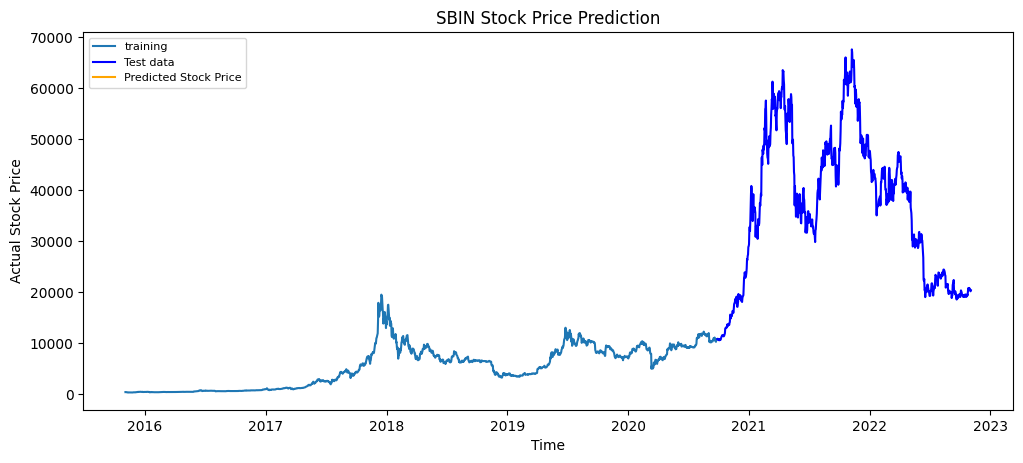

In [19]:
# Forecast
#fc, se, conf = results.forecast(519, alpha=0.05)  # 95% confidence
#fc = results.forecast(768, alpha=0.05)
fc = results_2.forecast(len(test_data))
conf = results_2.forecast(len(test_data))

fc_series = pd.Series(fc, index=test_data.index)
#fc_series = pd.Series(fc,lim_df[train_end:], df['Adj Close'])

lower_series = pd.Series(lim_df[: train_end], df['Adj Close'])
upper_series = pd.Series(lim_df[train_end:], df['Adj Close'])

#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)


#lower_series = pd.Series(lim_df[: train_end], index=test_data.index)
#upper_series = pd.Series(lim_df[train_end:], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

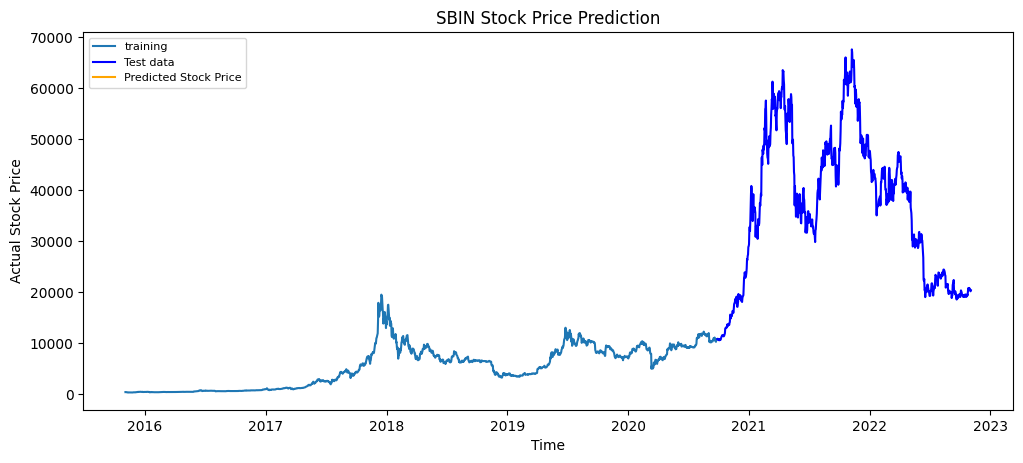

In [ ]:
# Forecast
fc = results_1.forecast(len(test_data))
conf = results_1.forecast(len(test_data))

fc_series = pd.Series(fc, index=test_data.index)

lower_series = pd.Series(lim_df[: train_end], df['Adj Close'])
upper_series = pd.Series(lim_df[train_end:], df['Adj Close'])

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [123]:
print(len(test_data))
test_data

768


Date
2020-09-27    10775.269531
2020-09-28    10709.652344
2020-09-29    10844.640625
2020-09-30    10784.491211
2020-10-01    10619.452148
                  ...     
2022-10-30    20635.603516
2022-10-31    20495.773438
2022-11-01    20485.273438
2022-11-02    20159.503906
2022-11-03    20335.416016
Freq: D, Name: Adj Close, Length: 768, dtype: float64

In [124]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Get the predictions and residuals
pred = results_6.forecast(len(test_data))
#pred = results.forecast(768)
#predictions = model_sarima.predict(len(test_data))
print(pred)

#pred = pd.Series(predictions, index=test_data.index)
#predictions = pd.Series(pred, index=df[train_end + timedelta(days=1):test_end]['Adj Close'].index)
#predictions = pd.Series(pred.values, index=df[train_end + timedelta(days=1):test_end].index)
#predictions = pd.Series(pred.values, index=df[train_end + timedelta(days=1):test_end]['Adj Close'].index)
#predictions = pd.Series(pred, index=df[train_end + timedelta(days=1):test_end]['Adj Close'].index)
#predictions
#predictions = pd.Series(pred, index=df[1790:]['Adj Close'].index)
#predictions
#residuals = test_data - predictions
#residuals =  predictions - test_data
#residuals


2022-11-04    20059.047846
2022-11-05    19757.504359
2022-11-06    19745.103635
2022-11-07    19393.629528
2022-11-08    19154.657746
                  ...     
2024-12-06     -897.763307
2024-12-07    -1072.589838
2024-12-08    -1052.243723
2024-12-09    -1471.258644
2024-12-10     -967.836539
Freq: D, Name: predicted_mean, Length: 768, dtype: float64


In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Get the predictions and residuals
pred = results_3.forecast(len(test_data))

print(pred)

2022-11-04    20146.614860
2022-11-05    19864.236220
2022-11-06    19872.438011
2022-11-07    19734.352324
2022-11-08    19709.724547
                  ...     
2024-12-06   -14818.457589
2024-12-07   -14807.518317
2024-12-08   -14930.708359
2024-12-09   -15130.073919
2024-12-10   -14901.311344
Freq: D, Name: predicted_mean, Length: 768, dtype: float64


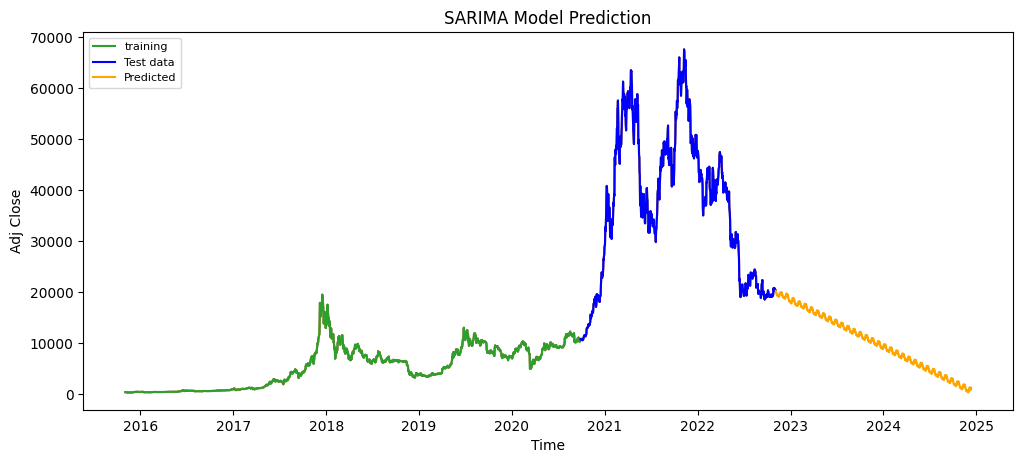

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
#plt.figure(figsize=(12,5))
plt.plot(df.index, df['Adj Close'])
plt.plot(lim_df)

plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
#plt.plot(predictions, color = 'orange',label='Predicted')
plt.plot(pred, color = 'orange',label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('SARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)
plt.show()

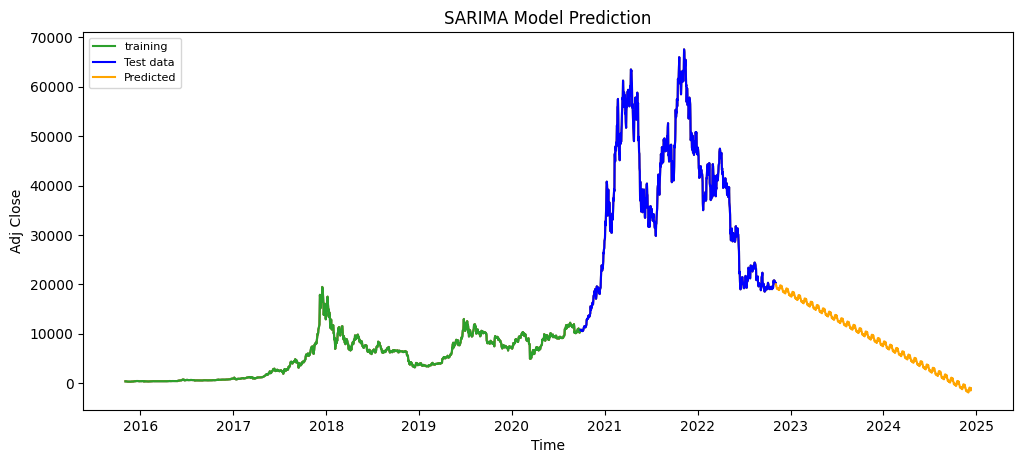

In [125]:
plt.figure(figsize=(12,5), dpi=100)
#plt.figure(figsize=(12,5))
plt.plot(df.index, df['Adj Close'])
plt.plot(lim_df)

plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
#plt.plot(predictions, color = 'orange',label='Predicted')
plt.plot(pred, color = 'orange',label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('SARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)
plt.show()

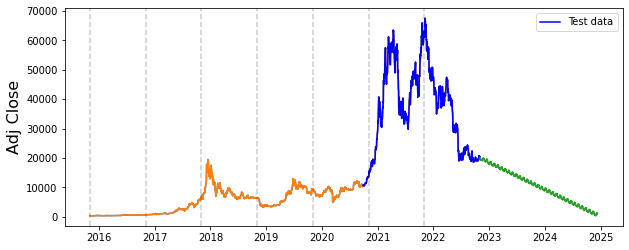

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Adj Close'])
plt.plot(lim_df)

#plt.plot(lim_df[train_end:]['Adj Close'],'blue',label= 'Test data')
plt.plot(lim_df[train_end:],'blue',label= 'Test data')
#plt.plot(test_data)

#plt.plot(predictions)
plt.plot(pred)
plt.legend(('Date','Predictions'), fontsize=16)

plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year, end_date.year):
  plt.axvline(pd.to_datetime(str(year)+'-11-3'), color='k', linestyle='--', alpha=0.2)

plt.legend()
plt.show()

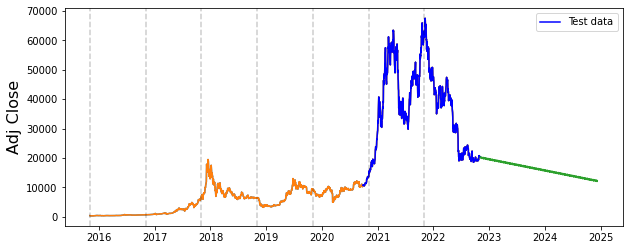

In [25]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Adj Close'])
plt.plot(lim_df)

#plt.plot(lim_df[train_end:]['Adj Close'],'blue',label= 'Test data')
plt.plot(lim_df[train_end:],'blue',label= 'Test data')
#plt.plot(test_data)

#plt.plot(predictions)
plt.plot(pred)
plt.legend(('Date','Predictions'), fontsize=16)

plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year, end_date.year):
  plt.axvline(pd.to_datetime(str(year)+'-11-3'), color='k', linestyle='--', alpha=0.2)

plt.legend()
plt.show()

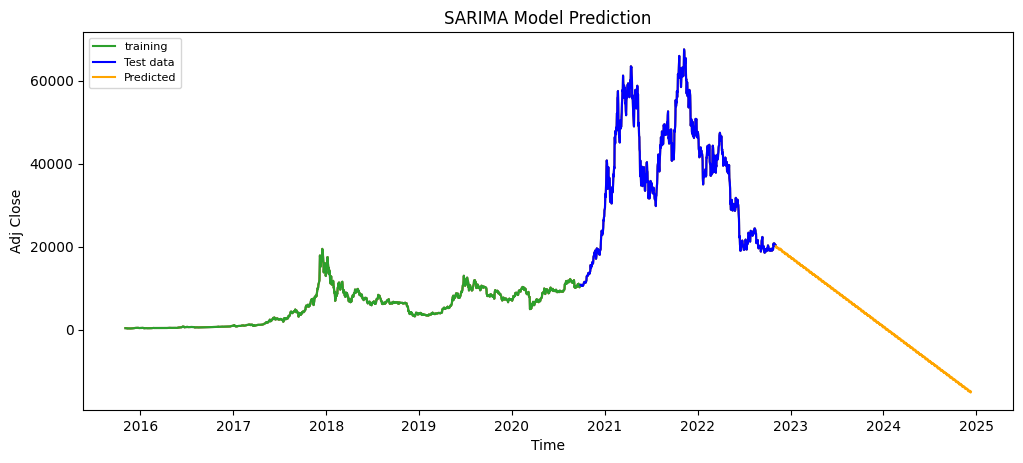

In [51]:
plt.figure(figsize=(12,5), dpi=100)
#plt.figure(figsize=(12,5))
plt.plot(df.index, df['Adj Close'])
plt.plot(lim_df)

plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
#plt.plot(predictions, color = 'orange',label='Predicted')
plt.plot(pred, color = 'orange',label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('SARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)
plt.show()

In [126]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test_data, pred)
#mse = mean_squared_error(test_data, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 31421.238134


In [127]:
mape = np.mean(np.abs(np.array(pred) - np.array(test_data))/np.abs(test_data))
print('MAPE: ' + str(mape))

MAPE: 0.7608505652845853
